In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table
measure = base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
last_date = session.query(measure.date).order_by(measure.date.desc()).first()[0]
Last_date = dt.datetime.strptime(last_date, "%Y-%m-%d")
last_date

'2017-08-23'

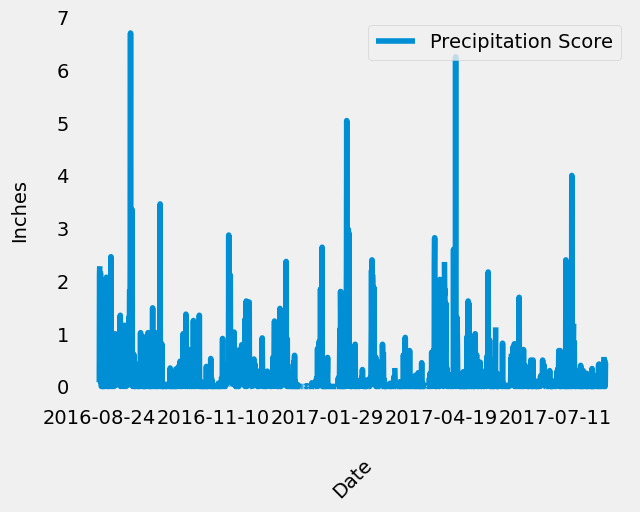

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

one_year_ago = Last_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
recent_year_data = (session.query(measure.date, measure.prcp).\
                  filter(measure.date > one_year_ago).\
                  order_by(measure.date).all())

# Save the query results as a Pandas DataFrame. Explicitly set the column names
recent_df = pd.DataFrame(recent_year_data, columns=["Date", "Precipitation Score"])

# Sort the dataframe by date
sort_df = recent_df.set_index("Date")

# Use Pandas Plotting with Matplotlib to plot the data
prcp_table = sort_df.plot(grid=False)
prcp_table.set_ylabel("Inches",labelpad=20)
prcp_table.set_xlabel("Date",labelpad=20, rotation = 45)
plt.legend(loc="upper right")
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
recent_df.describe()

,Precipitation Score
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(station.name).count()
station_count

9

In [13]:
station

sqlalchemy.ext.automap.station

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = (
    session.query(
      measure.station,  
      func.count(measure.id)
    )
    .filter(measure.station == station.station)
    .group_by(measure.station)
    .order_by(func.count(measure.id).desc())
    .all())
print(active_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [15]:
# Using the most active station id from the previous query
#calculate the lowest, highest, and average temperature.
station_temps = (session.query(
    func.min(measure.tobs),
    func.max(measure.tobs),
    func.avg(measure.tobs),
)
    .filter(measure.station == active_stations[0][0])
    .all()
)
station_temps

[(54.0, 85.0, 71.66378066378067)]

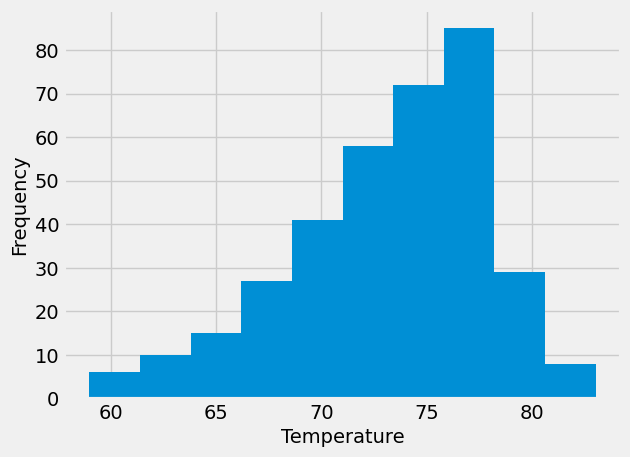

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_temp= (
    session.query(
      measure.date, 
      measure.tobs)
    .filter(measure.station == active_stations[0][0])
    .filter(measure.date > one_year_ago)
    .order_by(measure.date)
    .all()
)
most_temp_df = pd.DataFrame(most_temp)
most_temp_df = most_temp_df.set_index("date").sort_index(ascending=True)
plt.hist(most_temp_df['tobs'])
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [17]:
# Close Session
session.close()